# Week 3 - Logistic Regression with Python and Pandas

As you start Week 3 in Statistical Learning, the typical content might involve diving deeper into regression techniques, model selection, and more advanced methods like logistic regression, decision trees, or model evaluation techniques. Here’s an overview of what you might encounter:

### Week 3 Outline (General Statistical Learning Topics)
1. **Generalized Linear Models (GLMs)**:
   - Introduction to GLMs (extending linear models to non-normal distributions).
   - **Logistic Regression** for binary classification problems.
   - Link functions and their role in GLMs.
   
2. **Model Selection**:
   - **Cross-validation** (leave-one-out, k-fold, etc.).
   - **AIC (Akaike Information Criterion)** and **BIC (Bayesian Information Criterion)** for model comparison.
   - **Lasso, Ridge, and Elastic Net** for variable selection and regularization.

3. **Classification Methods**:
   - **K-nearest neighbors (KNN)** and how to choose k.
   - **Decision Trees** and pruning methods to avoid overfitting.
   
4. **Evaluation Metrics**:
   - **Confusion Matrix**, **ROC curves**, and **AUC** for classification tasks.
   - Precision, Recall, F1-score for binary classification.

Do any of these topics stand out for you, or would you like to go through specific concepts in detail?

## Step 1: Load and Explore the Data

In [58]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.show()

# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Display the first few rows
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Step 2: Data Preprocessing

In [46]:

# Drop rows with missing 'age' or 'embarked'
df = df.dropna(subset=['age', 'embarked'])

# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, columns=['sex', 'embarked', 'class'], drop_first=True)

# Select the features (age, fare, sex, embarked, class) and the target (survived)
X = df[['age', 'fare', 'sex_male', 'embarked_Q', 'embarked_S', 'class_Second', 'class_Third']]
y = df['survived']


## Step 3: Split the Data into Training and Test Sets

In [47]:

from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 4: Fit a Logistic Regression Model

In [48]:

from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

## Step 5: Evaluate the Model

Accuracy: 0.7902097902097902
Confusion Matrix:
 [[73  7]
 [23 40]]


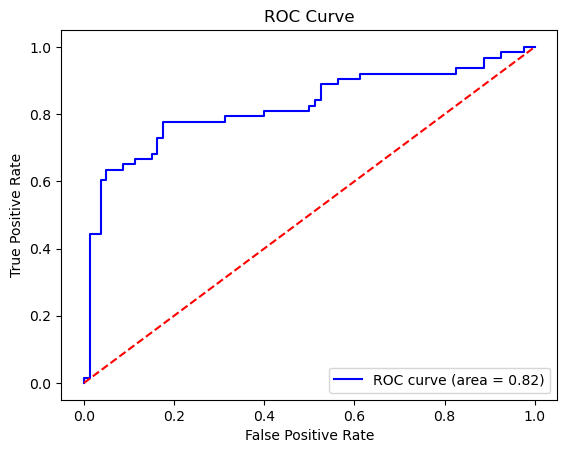

In [49]:

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# ROC Curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# Visualization

To enhance the understanding of the data and processes involved in Logistic Regression, let's add data visualizations throughout the steps. These visualizations will give insight into the data distribution, feature relationships, and the model's performance.

I'll revise the notebook to include visualizations for each step:

1. **Data Exploration**: Visualize the distribution of the target variable (`Survived`) and the features.
2. **Preprocessing**: Show correlations between features and the target variable.
3. **Model Evaluation**: Add a Confusion Matrix heatmap and visualize the ROC curve with added details.

Here's how the updated steps would look:

#### Step 1: Data Exploration
We'll start by visualizing the distribution of the `Survived` variable, and the relationship between survival and some important features like `Age`, `Fare`, and `Sex`.


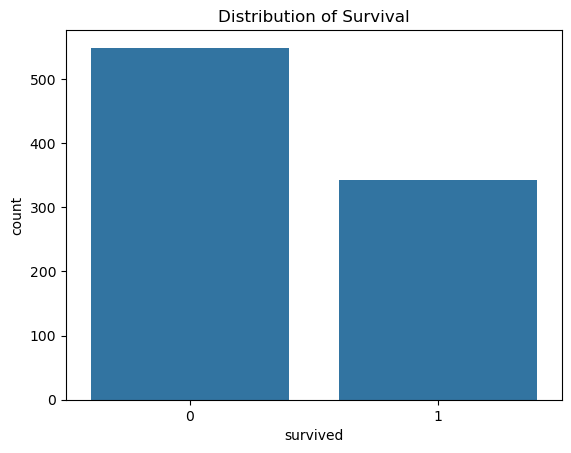

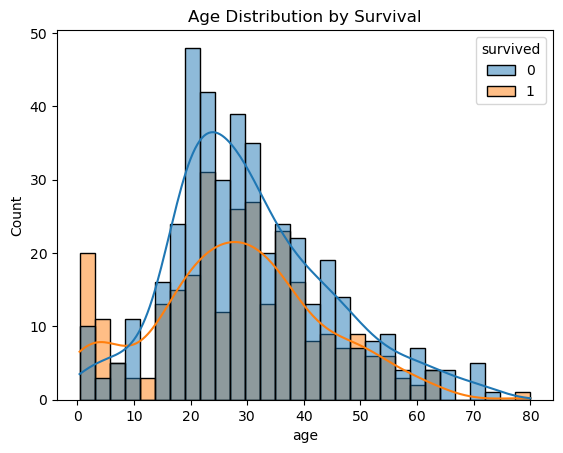

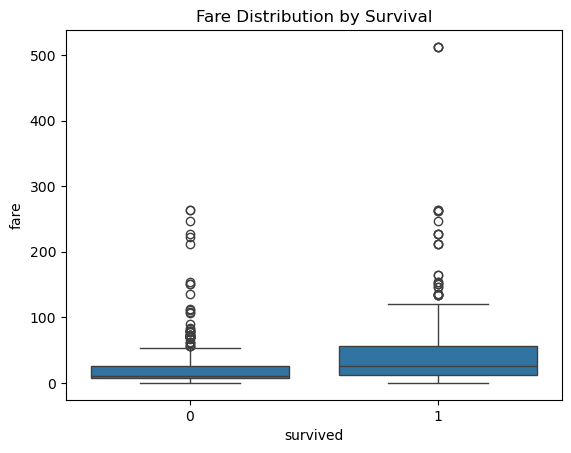

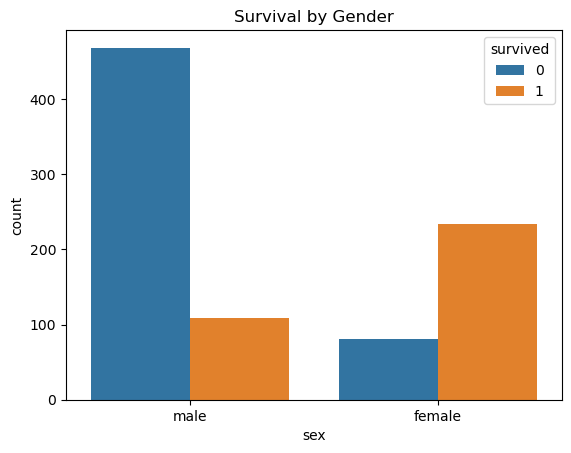

In [60]:
import matplotlib.pyplot as plt
plt.show()
import seaborn as sns


# Distribution of the target variable (Survived)
sns.countplot(data=df, x='survived')
plt.title('Distribution of Survival')
plt.show()

# Distribution of Age by Survival
sns.histplot(data=df, x='age', hue='survived', kde=True, bins=30)
plt.title('Age Distribution by Survival')
plt.show()

# Boxplot of Fare by Survival
sns.boxplot(data=df, x='survived', y='fare')
plt.title('Fare Distribution by Survival')
plt.show()

# Countplot of Survival by Sex
sns.countplot(data=df, x='sex', hue='survived')
plt.title('Survival by Gender')
plt.show()


Step 2: Feature Correlations

Visualize the correlation between features and the target variable.

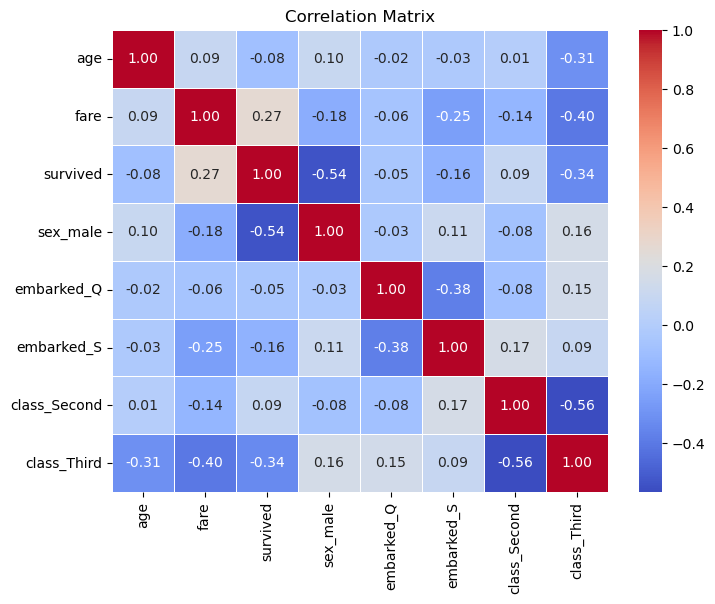

In [51]:
import matplotlib.pyplot as plt
# Correlation matrix
corr = df[['age', 'fare', 'survived', 'sex_male', 'embarked_Q', 'embarked_S', 'class_Second', 'class_Third']].corr()

# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Step 5: Model Evaluation (Additional Visualizations)

   1- Confusion Matrix Heatmap: To visualize the confusion matrix.

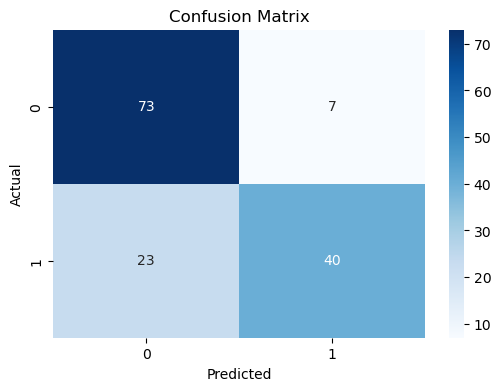

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.show()
# Confusion Matrix Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Step 5: Model Evaluation (Additional Visualizations)
   2- ROC Curve: We will expand the ROC curve plot to add more details.

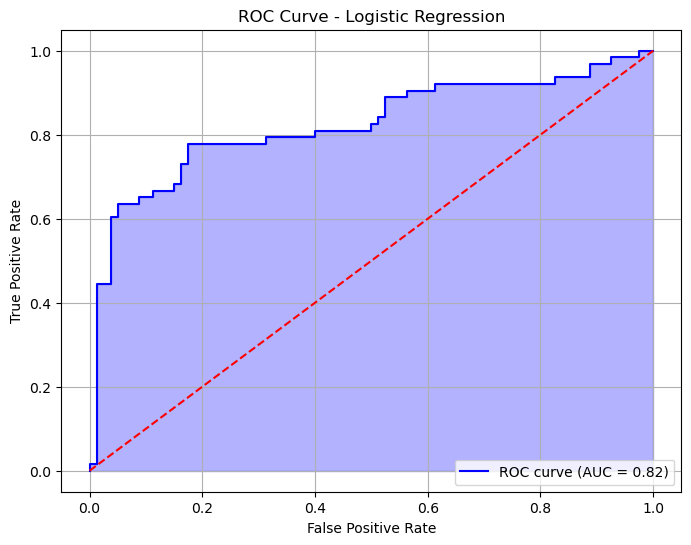

In [53]:
# ROC Curve with detailed visualization
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.fill_between(fpr, tpr, alpha=0.3, color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
